The aim of this notebook is to solve the following problem:

"INTRODUCTION

You have been given two time series:
* one with predicted wave height (in meters) versus time (in hours).
* one with the wave height threshold (in meters) versus time (in hours).

Your objective is to find the longest uninterrupted period during which the predicted wave height is at least 1 meter and below
the threshold.

ASSIGNMENTS
* Read in both data sets into an appropriate data structure.
* Interpolate both time series to a 1-hour sampling.
* Determine the longest uninterrupted window during which the wave height is at least 1 meter and below the threshold.
* print the starting time and duration (in whole hours) of the that window."

So I imported these libraries:

In [1]:
import pandas as pd #para carregar arquivos csv
import math
import random
import itertools
import matplotlib.pyplot as plt
import numpy as np

Build the following function, which receives both sets of data and performs interpolation with 1-hour samples:

In [2]:
def interpolate_data(x1, y1, x2, y2):
    x_min = min(min(x1), min(x2))
    x_max = max(max(x1), max(x2))


    # Cria uma grade uniformemente espaçada de valores de hora entre x_min e x_max
    x_interp = np.arange(x_min, x_max + 1)

    # Interpola os valores correspondentes nos conjuntos de dados originais
    y_interp_x1 = np.interp(x_interp, x1, y1)
    y_interp_x2 = np.interp(x_interp, x2, y2)

    return x_interp, y_interp_x1, y_interp_x2

The following two functions are only used as an aid to plotting graphs:

In [3]:
def plotar_grafico(horas, valores, label):
  plt.plot(horas, valores, marker='o', label=label)

In [4]:
def plotar_subplots(intervals, valores,color):
  for i in intervals:
    plt.plot( list(range(i[0], i[1] + 1)), valores[i[0]:i[1]+1], marker='o',color=color)

The following function receives the data sets that have already been interpolated (more specifically, the x-axis and the respective y-axes) and returns the values for the largest interval that fulfils the conditions of the problem and a list of all the intervals that fulfil this requirement:

In [5]:
def find_largest_interval(x, y1, y2):
    intervals = []
    start = None

    for i in range(len(y2)):
        if y2[i] >= 1 and y2[i] < y1[i]:
            if start is None:
                start = i
        elif start is not None:
            intervals.append((start, i - 1))
            start = None

    # Verificar se o último intervalo continua até o final
    if start is not None:
        intervals.append((start, len(y2) - 1))

    #print("intervals:",intervals)
    # Encontrar o intervalo mais longo
    largest_interval = max(intervals, key=lambda interval: interval[1] - interval[0])

    return x[largest_interval[0]], x[largest_interval[1]],intervals

Finally, I create a function that uses the previous functions to transfer the data from the CSVs, interpolate the data sets, find the largest interval that fulfils the requirements and, if the user wishes, select which plots to display in the arguments:

In [6]:
def wild_waves(path1,path2,plot_without_S=False,plt_with_S=False,sub_plots=False):
  #transferir os dados dos CSV
  pointsThreshold = pd.read_csv(path1)
  pointsWaveHeight = pd.read_csv(path2)

  # Interpolar os dados
  x_interp_hours, y_interp_threshold, y_interp_waveheight = interpolate_data(pointsThreshold['time'],pointsThreshold['threshold'],pointsWaveHeight['time'],pointsWaveHeight['waveheight'])

  # Descobrir o maior intevalo que satisfaz as condições que pretendemos
  start_x, end_x,intervals = find_largest_interval(x_interp_hours, y_interp_threshold, y_interp_waveheight)

  # Fazer plot do gráfico sem interpolação?
  if plot_without_S:
    plotar_grafico(pointsThreshold['time'],pointsThreshold['threshold'],'Threshold')
    plotar_grafico(pointsWaveHeight['time'],pointsWaveHeight['waveheight'],'Waveheight')
    plt.xlim(min(x_interp_hours)-10, max(x_interp_hours)+10)
    plt.ylim(min(min(y_interp_threshold),min(y_interp_waveheight)),max(max(y_interp_threshold),max(y_interp_waveheight))) # Define os limites do eixo y de 2 a 11
    plt.title('Wild Waves without interpolation')
    plt.xlabel('Hours')
    plt.ylabel('Meters')
    plt.grid(True)
    plt.legend()
    plt.show()

  # Fazer plot do gráfico com interpolação?
  if plt_with_S:
    plotar_grafico(x_interp_hours, y_interp_threshold,'Threshold')
    plotar_grafico(x_interp_hours, y_interp_waveheight,'Waveheight')
    plt.xlim(min(x_interp_hours)-10, max(x_interp_hours)+10)
    plt.ylim(min(min(y_interp_threshold),min(y_interp_waveheight)),max(max(y_interp_threshold),max(y_interp_waveheight))) # Define os limites do eixo y de 2 a 11
    plt.title('Wild Waves with interpolation')
    plt.xlabel('Hours')
    plt.ylabel('Meters')
    plt.grid(True)
    plt.legend()
    plt.show()

  # Fazer plot intervalos que satisfazem os requesitos?
  if sub_plots:
    plotar_subplots(intervals, y_interp_threshold,color='blue')
    plotar_subplots(intervals, y_interp_waveheight,color='orange')
    plt.xlim(min(x_interp_hours)-10, max(x_interp_hours)+10)
    plt.ylim(min(min(y_interp_threshold),min(y_interp_waveheight)),max(max(y_interp_threshold),max(y_interp_waveheight))) # Define os limites do eixo y de 2 a 11
    plt.title('Wild Waves sub-intervals')
    plt.xlabel('Hours')
    plt.ylabel('Meters')
    plt.grid(True)
    plt.legend()
    plt.show()

  print("Maior intervalo:")
  print("Início:", start_x)
  print("Fim:", end_x)
  print("Duração:", end_x-start_x)


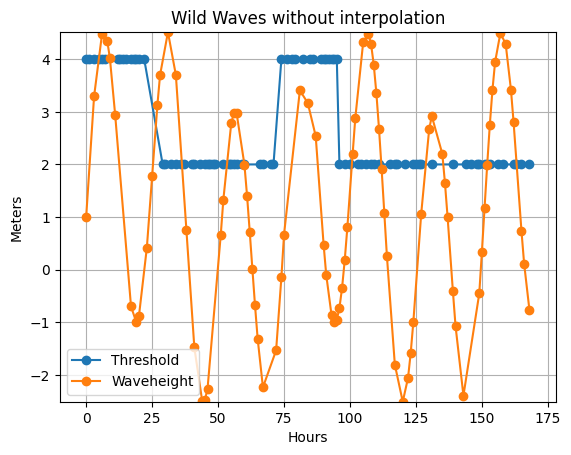

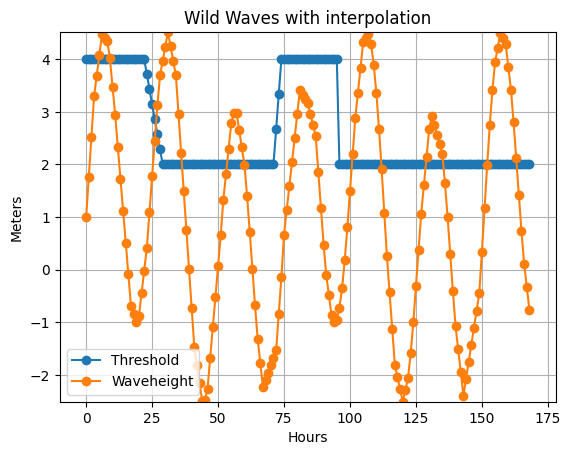

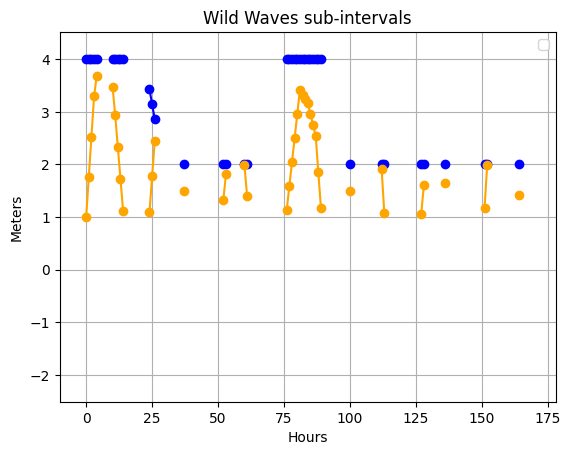

Maior intervalo:
Início: 76.0
Fim: 89.0
Duração: 13.0


In [7]:
wild_waves("/content/drive/MyDrive/DataScience_problems/coding-challenges/3_wild_waves_threshold.csv","/content/drive/MyDrive/DataScience_problems/coding-challenges/3_wild_waves_waveheight.csv",True,True,True)